In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [48]:
heart=pd.read_csv("heart.csv")

In [49]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [50]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [51]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


One-Sample T-test:

In [52]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(heart['chol'], 240)

The following hypothesis, 
Null Hypothesis: The average cholesterol level for patients is not higher than 240 mg/dl.
Alternative Hypothesis: The average cholesterol level for patients is higher than 240 mg/dl.

Suppose the p-value is less than the chosen significance level (e.g., 0.05). In that case, we reject the null hypothesis and conclude that the average cholesterol level in our sample significantly exceeds the threshold, potentially indicating elevated cardiovascular risk among the population under study.

The average cholesterol among the population within the dataset: 246.0


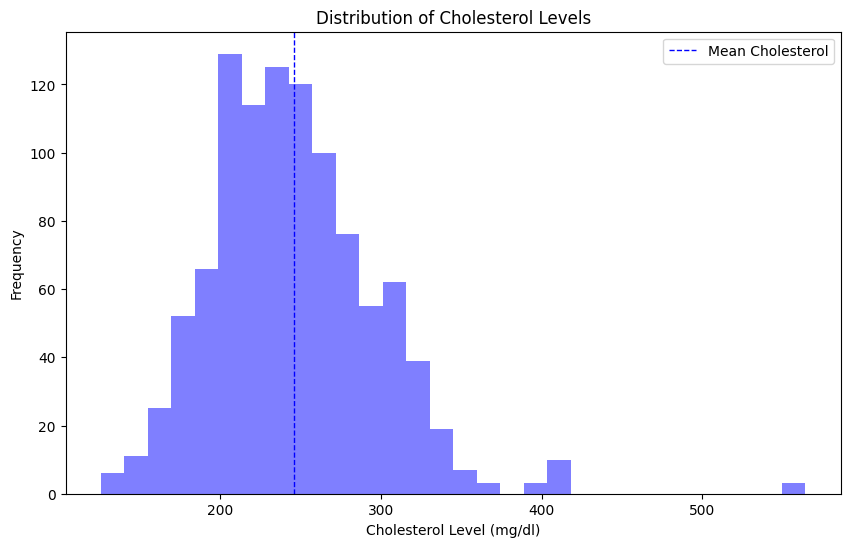

In [53]:
mean_total = np.mean(heart['chol'])
print('The average cholesterol among the population within the dataset:', mean_total)
plt.figure(figsize=(10, 6))
plt.hist(heart['chol'], bins=30, alpha=0.5, color='blue')
plt.axvline(mean_total, color='blue', linestyle='dashed', linewidth=1, label='Mean Cholesterol')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Frequency')
plt.title('Distribution of Cholesterol Levels')
plt.legend()
plt.show()

The distribution of cholesterol levels among the population appears to be slightly right-skewed, with several outliers observed on the higher end of the distribution.

In [54]:
from scipy.stats import ttest_1samp
tstat, pval = ttest_1samp(heart['chol'], 240)
alpha = 0.05 
alpha /= 2  # One-tailed test, divide alpha by 2 for one-sided test
print("One-Tailed One-Sample T-Test Results:")
if pval < alpha:
    print("Reject H0: There is enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.")
else:
    print("Fail to reject H0: There is not enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.")

One-Tailed One-Sample T-Test Results:
Reject H0: There is enough evidence to conclude that the mean cholesterol is higher than the commonly accepted threshold of 240 mg/dl.


The result suggests that, on average, individuals in the study group have cholesterol levels that exceed the threshold, potentially indicating an increased risk for heart disease or other cardiovascular conditions.

Two-Sample T-test:

In [55]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(heart['target'], heart['thalach'])

The following hypotheses,
Null Hypothesis: There is no difference in the average Maximum Heart Rate between patients with and without heart disease.
Alternative Hypothesis: Patients without heart disease have a statistically significantly lower average maximum heart rate.

Suppose the p-value is less than the chosen significance level (e.g., 0.05). In that case, we reject the null hypothesis and conclude that there is a statistically significant difference in the average Maximum Heart Rate between the two groups.

We observe a balanced distribution of patients with and without heart disease, with 51.3% of the population having heart disease. This suggests that the distribution is even, and we meet the criteria for a normally distributed sample.

The average thalach for patients with heart disease in the population within the dataset: 158.58555133079847
The standard deviation of thalach for patients with heart disease in the population within the dataset: 19.078766599604755
The average thalach for patients without heart disease in the population within the dataset: 139.1302605210421
The standard deviation of thalach for patients without heart disease in the population within the dataset: 22.54261309037062
Ratio of standard deviations (HD group / No HD group): 0.8463422817541285


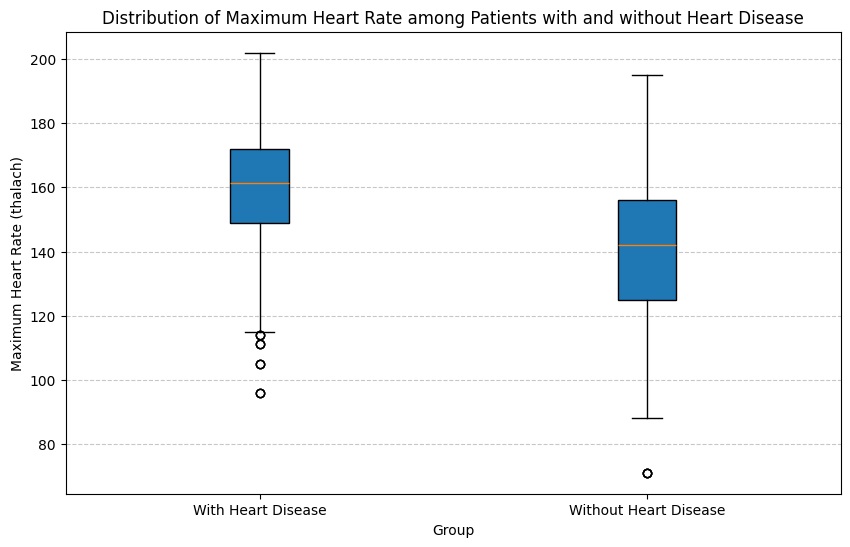

In [56]:
hd_thalach = heart[heart['target'] == 1]['thalach']
mean_hd_thalach = np.mean(hd_thalach)
std_hd_thalach = np.std(hd_thalach)
print('The average thalach for patients with heart disease in the population within the dataset:', mean_hd_thalach)
print('The standard deviation of thalach for patients with heart disease in the population within the dataset:', std_hd_thalach)

no_hd_thalach = heart[heart['target'] == 0]['thalach']
mean_no_hd_thalach = np.mean(no_hd_thalach)
std_no_hd_thalach = np.std(no_hd_thalach)
print('The average thalach for patients without heart disease in the population within the dataset:', mean_no_hd_thalach)
print('The standard deviation of thalach for patients without heart disease in the population within the dataset:', std_no_hd_thalach)

# Calculate the ratio of standard deviations
std_ratio = std_hd_thalach / std_no_hd_thalach

print('Ratio of standard deviations (HD group / No HD group):', std_ratio)

plt.figure(figsize=(10, 6))
plt.boxplot([hd_thalach, no_hd_thalach], patch_artist=True, labels=['With Heart Disease', 'Without Heart Disease'])
plt.xlabel('Group')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Distribution of Maximum Heart Rate among Patients with and without Heart Disease')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1. The average maximum heart rate (thalach) for patients with heart disease is approximately 158.59 beats per minute, with a standard deviation of approximately 19.08.
2. The average maximum heart rate for patients without heart disease is approximately 139.13 beats per minute, with a standard deviation of approximately 22.54.
3. The ratio of standard deviations between the group with heart disease and the group without heart disease is approximately 0.85, which is close to 1. This suggests that the assumption of equal standard deviations, a prerequisite for conducting a two-sample t-test, is reasonable.

In [57]:
from scipy.stats import ttest_ind

# Perform one-tailed two-sample t-test
t_stat, p_val = ttest_ind(hd_thalach, no_hd_thalach, alternative='less')

print("One-Tailed Two-Sample T-Test Results:")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: Patients without heart disease have a statistically significantly lower average maximum heart rate.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in average maximum heart rate between patients with and without heart disease, or the difference is not in the expected direction.")

One-Tailed Two-Sample T-Test Results:
Fail to reject the null hypothesis: There is no statistically significant difference in average maximum heart rate between patients with and without heart disease, or the difference is not in the expected direction.


This result suggests that we cannot conclude that patients without heart disease have a lower average maximum heart rate compared to those with heart disease.

ANOVA Test:

In [58]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(heart[heart['cp'] == 'ATA']['trestbps'], heart[heart['cp'] == 'NAP']['trestbps'], heart[heart['cp'] == 'ASY']['trestbps'], heart[heart['cp'] == 'TA']['trestbps'])


The following hypotheses:
Null Hypothesis: There is no significant difference in the average resting blood pressure among patients with different types of chest pain.
Alternative Hypothesis: There is a significant difference in the average resting blood pressure among patients with different types of chest pain.

Suppose the p-value obtained from the ANOVA test is less than the chosen significance level (e.g., 0.05). In that case, we reject the null hypothesis and conclude that there is a statistically significant difference in the average resting blood pressure among patients with different types of chest pain.

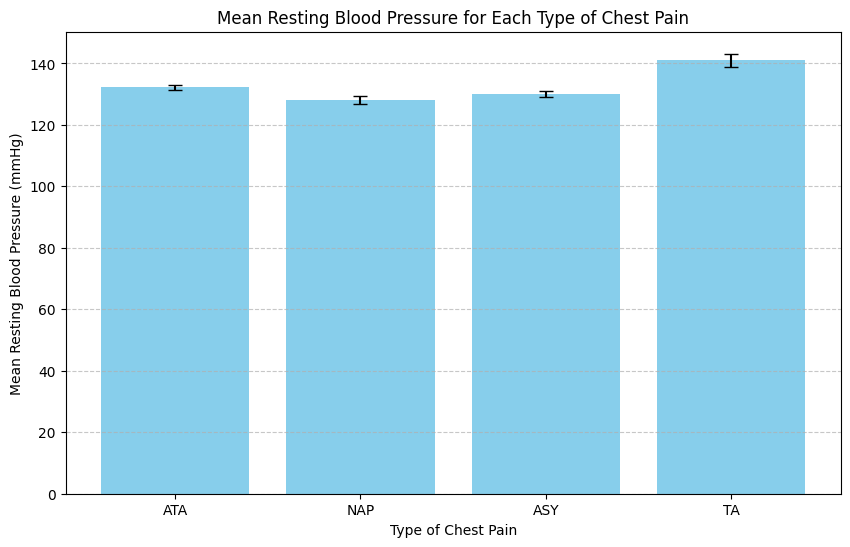

In [59]:
grouped_data = heart.groupby('cp')['trestbps'].mean().reset_index()
# Calculate standard deviation for each type of chest pain
std_dev = heart.groupby('cp')['trestbps'].std()

# Calculate standard error for each type of chest pain
sample_sizes = heart.groupby('cp').size()
std_error = std_dev / np.sqrt(sample_sizes)

# Plot a bar chart with error bars
plt.figure(figsize=(10, 6))
plt.bar(x=grouped_data['cp'], height=grouped_data['trestbps'], yerr=std_error, capsize=5, color='skyblue', label='Mean Resting Blood Pressure')
plt.xlabel('Type of Chest Pain')
plt.ylabel('Mean Resting Blood Pressure (mmHg)')
plt.title('Mean Resting Blood Pressure for Each Type of Chest Pain')
plt.xticks(grouped_data['cp'], ['ATA', 'NAP', 'ASY', 'TA']) 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

The level of resting blood pressure does not appear to vary significantly among the different types of chest pain. For Atypical Angina, Non-Anginal Pain, and Asymptomatic, the mean resting blood pressure hovers around 130 mmHg, while the parameter for Typical Angina seems to be slightly higher, at approximately 140 mmHg, with a slightly higher standard deviation.

In [60]:
from scipy.stats import f_oneway

group1 = heart[heart['cp'] == 'ATA']['trestbps']
group2 = heart[heart['cp'] == 'NAP']['trestbps']
group3 = heart[heart['cp'] == 'ASY']['trestbps']
group4 = heart[heart['cp'] == 'TA']['trestbps']

f_stat, p_val = f_oneway(group1, group2, group3, group4)

print("ANOVA Test Results:")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference in mean resting blood pressure among patients with different types of chest pain.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in mean resting blood pressure among patients with different types of chest pain.")

ANOVA Test Results:
Fail to reject the null hypothesis: There is no statistically significant difference in mean resting blood pressure among patients with different types of chest pain.


The data does not provide enough support to reject the null hypothesis, which suggests that the mean resting blood pressure is similar across all types of chest pain.

Binomial Test:

In [61]:
from scipy.stats import binomtest
pval = binomtest((heart['fbs'] == 1).sum(), len(heart), 0.2)

The following hypotheses:
Null Hypothesis: The proportion of patients with high fasting blood sugar is not significantly different from 0.2.
Alternative Hypothesis: The proportion of patients with high fasting blood sugar is significantly lower from 0.2.

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that the observed proportion significantly differs from the expected proportion of 0.2. Otherwise, we fail to reject the null hypothesis.

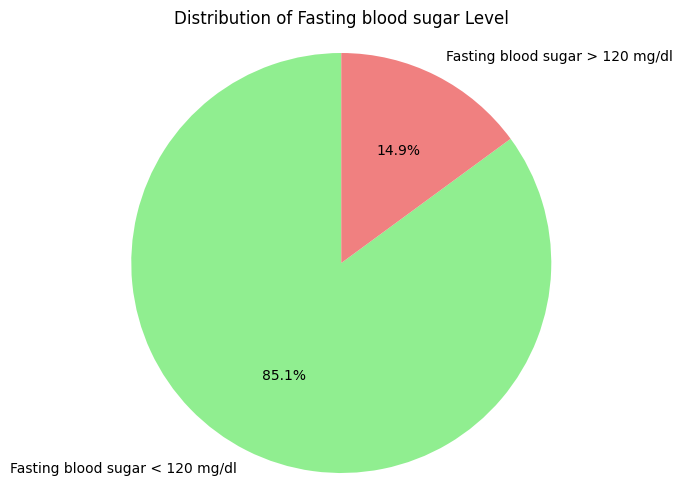

In [62]:
# Count the occurrences of each target value
fbs_counts = heart['fbs'].value_counts()

colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.pie(fbs_counts, labels=['Fasting blood sugar < 120 mg/dl', 'Fasting blood sugar > 120 mg/dl'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Distribution of Fasting blood sugar Level')
plt.axis('equal')  
plt.show()

There’s arount 15% of people from the examined group who have high fasting blood sugar (>120 mg/dl).

In [63]:
from scipy.stats import binomtest

num_high_fbs = heart[heart['fbs'] == 1]['fbs'].count()
total_patients = len(heart)
expected_proportion = 0.2

# Perform one-tailed binomial test (lower)
pval = binomtest(num_high_fbs, n=total_patients, p=expected_proportion, alternative='less')

print("One-Tailed Binomial Test Results:")

alpha = 0.05
if pval.pvalue < alpha:
    print("Reject the null hypothesis: The proportion of patients with high fasting blood sugar is significantly lower than 0.2.")
else:
    print("Fail to reject the null hypothesis: The proportion of patients with high fasting blood sugar is not significantly lower than 0.2.")

One-Tailed Binomial Test Results:
Reject the null hypothesis: The proportion of patients with high fasting blood sugar is significantly lower than 0.2.


The result indicates that the observed proportion of patients with high fasting blood sugar in the dataset is significantly lower from the expected proportion of 0.2

Chi-Square Test:

In [64]:
from scipy.stats import chi2_contingency
contengency_table=pd.crosstab(heart['cp'], heart['exang'])
chi2_stat, p_val, dof, expected = chi2_contingency(contengency_table)

The following hypotheses:
Null Hypothesis: There is no significant association between the type of chest pain and the presence of exercise-induced angina.
Alternative Hypothesis: There is a significant association between the type of chest pain and the presence of exercise-induced angina.

If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Otherwise, we fail to reject the null hypothesis.

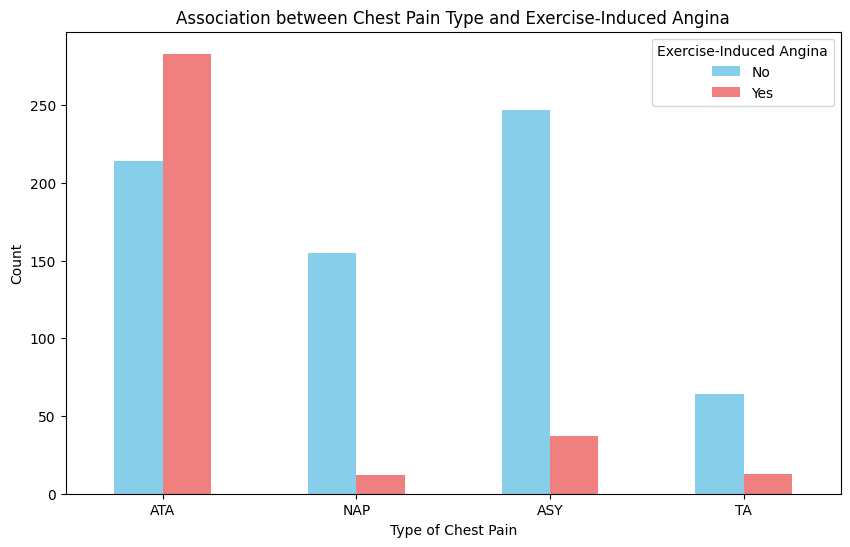

In [65]:
# Group data by 'cp' and 'exang' and count occurrences
grouped_data = heart.groupby(['cp', 'exang']).size().unstack(fill_value=0)

ax= grouped_data.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Type of Chest Pain')
plt.ylabel('Count')
plt.title('Association between Chest Pain Type and Exercise-Induced Angina')
plt.xticks(rotation=0)
ax.set_xticklabels(['ATA', 'NAP', 'ASY', 'TA'])
plt.legend(title='Exercise-Induced Angina', labels=['No', 'Yes'])
plt.show()

In [66]:
from scipy.stats import chi2_contingency

observed_data = heart.groupby(['cp', 'exang']).size().unstack(fill_value=0)

chi2_stat, p_val, dof, expected = chi2_contingency(observed_data)

print("Chi-Square Test Results:")

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis: There is a significant association between the type of chest pain and the presence of exercise-induced angina.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between the type of chest pain and the presence of exercise-induced angina.")

Chi-Square Test Results:
Reject the null hypothesis: There is a significant association between the type of chest pain and the presence of exercise-induced angina.


There appears to be a meaningful and statistically significant association between chest pain types and the presence of exercise-induced angina.